## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path= "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
study_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_metadata['Mouse ID'])
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = study_data_df[study_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_id = duplicate_mice.drop_duplicates()
duplicate_mouse_id.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_df = study_data_df.loc[study_data_df['Mouse ID']!='g989']
clean_study_data_df = pd.DataFrame(clean_study_data_df)
clean_study_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice = clean_study_data_df['Mouse ID'].nunique()
#clean_number_mice = len(clean_study_data_df["Mouse ID"])
clean_number_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_stats = clean_study_data_df[['Drug Regimen','Tumor Volume (mm3)']]
tumor_df =tumor_stats.groupby(['Drug Regimen']).mean()
tumor_df = tumor_df.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})
tumor_df['Median Tumor Volume']=tumor_stats.groupby(['Drug Regimen']).median()
tumor_df['Tumor Volume Variance ']=tumor_stats.groupby(['Drug Regimen']).var()
tumor_df['Tumor Volume Std. Dev.']=tumor_stats.groupby(['Drug Regimen']).std()
tumor_df['Tumor Volume Std. Err.']=tumor_stats.groupby(['Drug Regimen']).sem()
tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_study_data_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

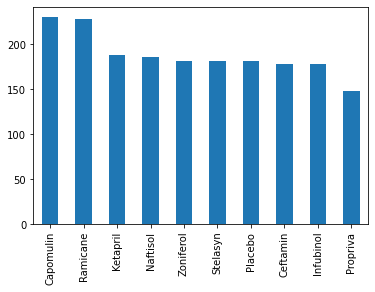

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouseplt =clean_study_data_df["Drug Regimen"].value_counts()

mouseplt.plot(kind="bar",x="Drug Regimen", y="Number of Unique Mice Test")
plt.show()


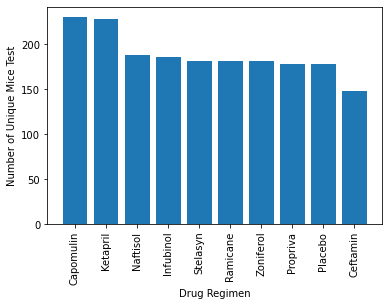

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

myplt = clean_study_data_df["Drug Regimen"].unique()

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Test")
plt.bar(myplt, height=(mouseplt))
plt.xticks(rotation=90)
plt.show()

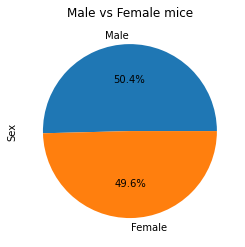

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_vs_female_pie = clean_study_data_df.drop_duplicates(subset=["Mouse ID"])
male_vs_female_pie = male_vs_female_pie["Sex"].value_counts()

labels = ["Male", "Female"]
plt.title("Male vs Female mice")
male_vs_female_pie.plot.pie(y='Sex', labels=labels, autopct="%1.1f%%")
plt.show()

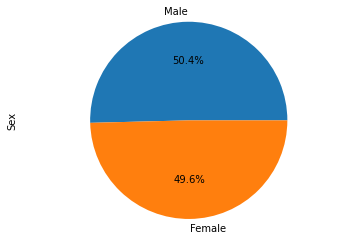

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = 'Male','Female'
sizes = male_vs_female_pie

fig1, ax1 = plt.subplots()
#plt.title("Male vs Female mice")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 
#plt.legend()
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_df = clean_study_data_df.sort_values(by='Timepoint', ascending=False)
sorted_df = sorted_df.drop_duplicates(subset=["Mouse ID"])
druglist = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
sorted_df = sorted_df.loc[(sorted_df["Drug Regimen"].isin(druglist))]
sorted_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1795,s508,45,30.276232,0,Ramicane,Male,1,17
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1799,z578,45,30.638696,0,Ramicane,Male,11,16
1800,m957,45,33.329098,1,Capomulin,Female,3,19
1801,e662,45,40.659006,2,Ramicane,Male,8,24
...,...,...,...,...,...,...,...,...
420,c326,5,36.321346,0,Infubinol,Female,18,25
217,x226,0,45.000000,0,Ceftamin,Male,23,28
194,b447,0,45.000000,0,Ceftamin,Male,2,30
222,t573,0,45.000000,0,Ceftamin,Female,15,27


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = sorted_df["Drug Regimen"].unique().tolist()
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
for i, treatment in enumerate(treatments):
    filtered_df = sorted_df.loc[(sorted_df["Drug Regimen"] == treatment)]
    tumor_vol.append(filtered_df[["Mouse ID","Drug Regimen",'Tumor Volume (mm3)']])
    Q1 = filtered_df['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = filtered_df['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = round(Q1 - (1.5 * IQR),4)
    upper_bound = round(Q3 + (1.5 * IQR),4)
    print(f"Values below {lower_bound} and above {upper_bound} would be considered outliers")

Values below 17.9127 and above 54.3068 would be considered outliers
Values below 20.7046 and above 51.832 would be considered outliers
Values below 36.8329 and above 82.7414 would be considered outliers
Values below 25.3554 and above 87.6665 would be considered outliers


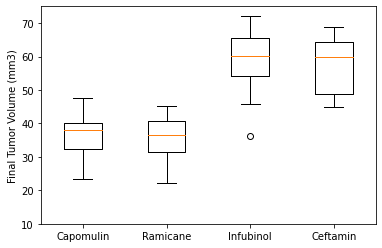

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Values per regimen
values_per_reg = pd.DataFrame(tumor_vol[0])
values_per_reg = values_per_reg.append(pd.DataFrame(tumor_vol[1]))
values_per_reg = values_per_reg.append(pd.DataFrame(tumor_vol[2]))
values_per_reg = values_per_reg.append(pd.DataFrame(tumor_vol[3]))

#Get a dataframe with only tumor volumne and drug regimen
drug_vs_tvol = values_per_reg.reset_index() 
drug_vs_tvol = values_per_reg[["Drug Regimen","Tumor Volume (mm3)"]] 


#Seperate drugs by regimen into series
cap_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Capomulin"]
cap_drug = cap_drug.reset_index()
cap_drug_series = cap_drug["Tumor Volume (mm3)"]
cap_drug_series = pd.Series(cap_drug_series)

rami_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Ramicane"]
rami_drug = rami_drug.reset_index()
rami_drug_series = rami_drug["Tumor Volume (mm3)"]
rami_drug_series = pd.Series(rami_drug_series)

inf_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Infubinol"]
inf_drug = inf_drug.reset_index()
inf_drug_series = inf_drug["Tumor Volume (mm3)"]
inf_drug_series = pd.Series(ceft_drug_series)

cef_drug = drug_vs_tvol.loc[drug_vs_tvol["Drug Regimen"] == "Ceftamin"]
cef_drug = cef_drug.reset_index()
cef_drug_series = cef_drug["Tumor Volume (mm3)"]
cef_drug_series = pd.Series(capo_drug_series)

#plot all series on same plot
data = [cap_drug_series, rami_drug_series, inf_drug_series, cef_drug_series]
fig7, ax7 = plt.subplots()

plt.ylabel("Final Tumor Volume (mm3)")
plt.ylim(10,75)
ax7.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane','Infubinol', 'Ceftamin' ])
plt.show()

## Line and Scatter Plots

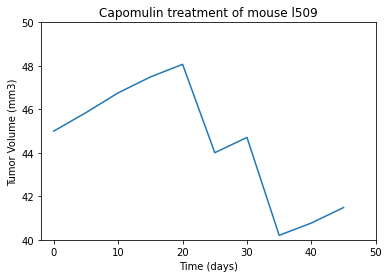

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capmice = clean_study_data_df.loc[clean_study_data_df["Drug Regimen"] == "Capomulin"]
capmouse = clean_study_data_df.loc[clean_study_data_df["Mouse ID"] == "l509"] 
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(40,50)
plt.xlim(-2,50)
plt.plot(capmouse["Timepoint"], capmouse["Tumor Volume (mm3)"] )
plt.show()

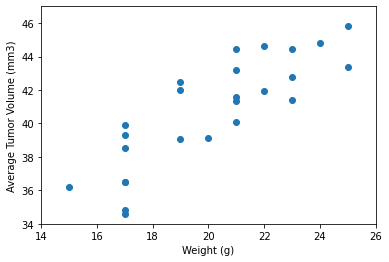

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor_vol = capmice.groupby("Mouse ID").mean()

x_axis = average_tumor_vol["Weight (g)"]
y_axis = average_tumor_vol["Tumor Volume (mm3)"]


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.ylim(34,47)
plt.xlim(14,26)

plt.scatter(x_axis, y_axis ) 
plt.show()

## Correlation and Regression

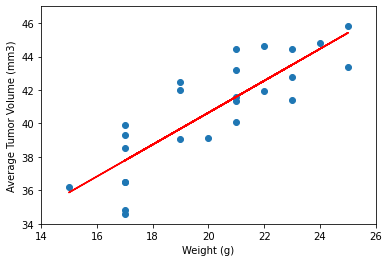

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis, y_axis)
rounded_corr = round(correlation[0],4)
#rounded_corr
from scipy.stats import linregress

slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
regress_values = x_axis*slope + intercept
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.ylim(34,47)
plt.xlim(14,26)
plt.show()

